# 1. Random walk on random networks

In [18]:
library("igraph")
library(repr)
options(repr.plot.width=4, repr.plot.height=4)
colors = c("red", "yellow", "green", "violet", "orange", "blue", "pink", "cyan")

# Implementation of Random Walk, with teleportation
rwalk <- function(g, start, ncount) {
    node <- start
    path <- rep(NA, ncount)
    path[1] <- node
    i <- 2 

    while(i <= ncount) {
        neigh <- neighbors(g, node)
        if(length(neigh) <= 1){
            # teleport
            node <- sample.int(vcount(g), 1)
        } else {
            node <- sample(neigh, 1)
        }

        path[i] <- node
        i <- i + 1
    }
    
    path
}


## Part (a) :
Create undirected random networks with 1000 nodes, and
the probability p for drawing an edge between any pair of
nodes equal to 0.01.

# Part (b):

In [40]:
random_walker <- function(nv, probability, walk_length = 60, num_graphs=10, num_walks=25) {
    diameters = c()
    average_step_t = c()
    average_standard_deviation_t = c() 
    deg_all = c()
    deg_end = c()
    
    W = NULL
    
    for(gc in (1 : num_graphs)){
        g =  random.graph.game(n = nv, p = probability, directed = FALSE)
        distance_matrix = shortest.paths(g, v = V(g), to = V(g))
        deg_all = c(deg_all, degree(g))
        diameters = c(diameters, diameter(g))
        
        # Perform num_walks walks
        for(i in (1 : num_walks)){
            W = cbind(W, rwalk(g, sample.int(vcount(g), 1), walk_length))
        }
    }
    
    # Next, compute statistics
    for(t in 1 : walk_length) {
        distance = numeric()

        for(i in (1 : (num_walks * num_graphs))){
            start_vertex = W[1,i]
            tail_vertex  = W[t,i]

            shortest_distance = distance_matrix[start_vertex, tail_vertex]
            if (shortest_distance == Inf) {
                shortest_distance = 0
            }
            distance = c(distance, shortest_distance)
        }
        deg_end = c(deg_end, degree(g, v = W[t,])) 
        average_step_t = c(average_step_t, mean(distance))
        average_standard_deviation_t = c(average_standard_deviation_t, mean((distance - mean(distance))**2))    
    }
    
    return(
        list("s(t)" = average_step_t, 
             "sigma(t)" = average_standard_deviation_t, 
             "d(all)" = deg_all,
             "d(end)" = deg_end
        )
    )
}

plot_average_path_length = function(W, vmax) {
    plot(
        1 : 60, 
        W$`s(t)`, 
        type="l", 
        xlab="Number of steps(t)", 
        ylab = "Average Path length <s(t)>",
        ylim = c(0, vmax),
        main = "Plot of average path length"
    )
}

plot_sd_path_length = function(W, vmax) {
    plot(
        1 : 60, 
        W$`sigma(t)`, 
        type="l", 
        xlab="Number of steps(t)", 
        ylab = "Standard deviation",
        ylim = c(0.0, vmax),
        main = "Plot of SD of path length"
    )
}

In [31]:
W1000 = random_walker(1000, 0.01)

In [32]:
W1000

$`s(t)`
 [1] 0.000 3.064 2.800 3.180 3.204 3.260 3.124 3.224 3.240 3.264 3.328 3.308
[13] 3.244 3.260 3.276 3.288 3.288 3.372 3.248 3.252 3.364 3.248 3.372 3.272
[25] 3.324 3.288 3.240 3.264 3.232 3.240 3.192 3.244 3.264 3.216 3.264 3.236
[37] 3.252 3.320 3.288 3.264 3.284 3.324 3.324 3.328 3.236 3.300 3.256 3.268
[49] 3.264 3.268 3.304 3.228 3.360 3.232 3.296 3.288 3.268 3.288 3.304 3.228

$`sigma(t)`
 [1] 0.000000 0.923904 1.480000 0.611600 0.610384 0.480400 0.604624 0.493824
 [9] 0.502400 0.538304 0.436416 0.413136 0.536464 0.504400 0.447824 0.373056
[17] 0.429056 0.425616 0.458496 0.476496 0.423504 0.418496 0.481616 0.462016
[25] 0.467024 0.381056 0.390400 0.474304 0.490176 0.502400 0.515136 0.416464
[33] 0.458304 0.569344 0.442304 0.492304 0.564496 0.481600 0.381056 0.450304
[41] 0.451344 0.355024 0.419024 0.372416 0.516304 0.538000 0.478464 0.468176
[49] 0.394304 0.476176 0.427584 0.512016 0.502400 0.442176 0.488384 0.469056
[57] 0.364176 0.453056 0.427584 0.472016

$`d(all)`
    [1]  9 12 11  8 12 14  8  8  8  9  6 15  3 10  5 12  9 13  9 12 12  8 10 16
   [25] 19 23 15 10  8 12  7 12 17 13 12 14 12  5  3  8  5  7 15 11  5 14 15 14
   [49]  5  8  6  9 17 10  7  5  4  7  8 11 15  8 11 10 15  6  8 10  8  5 11  8
   [73] 13 12 10  7 12 10  8 12  9 11 13  7  8 13 12 12 13  9  8  9 12 11 13 17
   [97]  9 16  6 13  9 15 11 11 11  7 12 11 12  5 11 10  6 14  7  3 11 10 12 16
  [121]  8 15 11 13 12 13 13  7  9 11  6  7 11  7  7  6 16  8  8 15 12  9 10 11
  [145] 12 12  9 12 10 14  4 16  9  8 10 10 13 11  7 10  5  9 13 11 12 13 10  7
  [169]  7  7 11 10 11 11 11 12  9 10 10  7  4 14 10  3 12  9  8 12 11  7 13 12
  [193] 16 14 15  7 11  8 11 11 11 11 15  9  6 13 15  8 10 12 11 10 10  5  9 13
  [217] 12  9 11  6 15 11 13 12  4  8 16 18  3  4  5 11  6  9 12  7  9  7 15 13
  [241] 12 12 11  7  7  6  6  8  9 11 12 18  7  6  6  5 10  4 11 10 14 16  7  9
  [265]  8 13  6 13 12  9 14  7 10  6  9 15 10 11 11  9 17 13 11 10  9  8 12  6
  [289]  9  7  3  8  7 11 12 15  7  7 13  4 12 10  7 10  9 16 11  9 11  6 10 12
  [313] 13 13 11 12  4  7 11 10  7 11 10 10 10  9  8 10 13  9 14  6  7 13 13 10
  [337] 12 11  6  9 13 12  8 13  7 13  8  8 15  5 18 12  8  8 14 13 16  7 13  9
  [361]  6 13  7 15  9 12 10 19  9 11  7  7  7 12 15  5 11 17  5  8  6  9 14  8
  [385] 13 10  9 13 13 15 12 15  9  6 12 10 13 11 16  8 12  8 10  7 12  9 11 10
  [409] 10 13 16 10 12  8 11  7 14 11 11 12 16 14  8  7 15 10  7 11 18 11 15 11
  [433] 10  5 10  5 12 18  9  6  7  7  4 13 19 13 14  8  5 10 22 16 15 10  8  3
  [457] 10 10  8 10 11  9 13  6 11  5 10 13 12 12 13 11 12  3  8 13  4 17 12  9
  [481] 10 16  8 10 10 11  5 13  7  9 15 17  5  9  9 13  9  9 13 12 12 12 12 11
  [505] 11  8 13 12  9 10  9 10 14 17  9 14 11  9  9 11 10  8 10 11 13 18 12  6
  [529]  9 10  9 12 12  8  9 10  6 13 10  8 10 10  8  7 11 10  7  7  9 16  4 11
  [553]  8  6  4  9 15  4 10 12 14 12  8 11 11 11  9 13 10 12 10  8 11 12 13 14
  [577] 10  3  9 14 11 14 11 12 14  6 15  6 11 14  7 11 13 20 17 14 11  7 13  8
  [601] 10 11 10 12  9  3 13 10 12 10 13 12  9 13 11  5  9 11 11  7  9  5 12 10
  [625]  7  4  7 15 11  7  9  6  8  9 10 13  7  5 13  9 12  8 10 10  9  5  4  7
  [649]  6 14  9  7 12 11  9 15  9  8 14  8  9  6 12  9 11 12 10 10  6  9 11  7
  [673]  7  7  9  4  8  8 14  9 12 11 12  5 14 14  9  9  5 11 12 17  8 10  6 13
  [697] 10  6 14  9  6  9  8 12  8  6  8 12  7 10  9 10  6 15 11 12  8 10 14 13
  [721]  7 13  9  7  8 10 14 18 10  5  7 10 10 15  8 14  7 12 10  8  7  8 10  8
  [745]  4 10 14 10  9 10 13  5 10 12 11  6  9 10  9 12 13 10  6  8  8  7 12 15
  [769] 14 10 15  9 13  8  4 12 13  5 11 15  9  9 14  8 10 12 11 11  9 12  9 10
  [793] 10 11 14 10  6  7  9  9 12  9  7 10  8 11 14 16 13 10  9 12  9  7 12  8
  [817] 16  8 17  8 13 14  4  8  5  9  9 10  7  7 10 12  8  9  8 11  5 10 12 12
  [841] 11 10 11  9  7 11 12 10 11 12 11  9  6 10  9 14  7  4 13 13  7  9  5  8
  [865]  7 10 14 13 11  8 11 11 11 11  8 17 11  4 15  7 13  9  7 14  8  8 14 10
  [889] 15 13 12 11  9  9  9  7 14 11  9 11

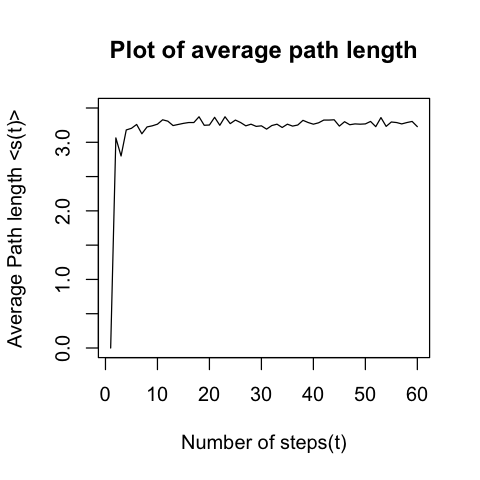

In [33]:
plot_average_path_length(W1000, 3.5)

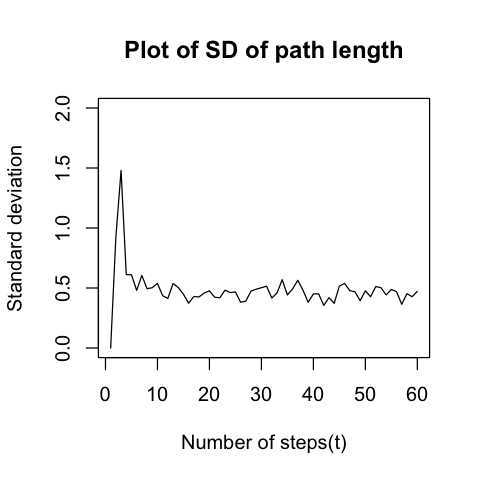

In [35]:
plot_sd_path_length(W1000, 2)

In [36]:
cat("Mean s(t) is ", mean(W1000$`s(t)`))

Mean s(t) is  3.204267

In [37]:
cat("Mean sigma(t) is ", mean(W1000$`sigma(t)`))

Mean sigma(t) is  0.4839397

## Part(e)

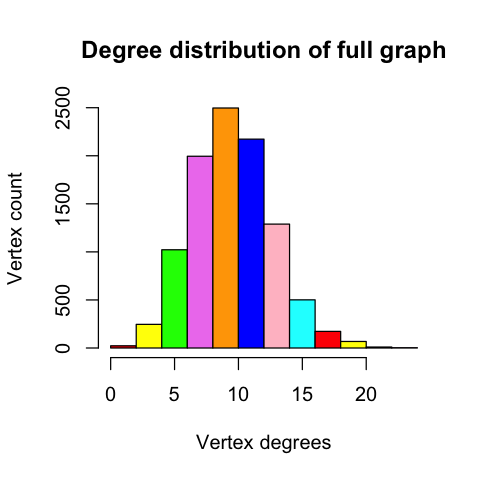

In [38]:
hist(
    W1000$`d(all)`, 
    col=colors,
    main="Degree distribution of full graph",
    xlab="Vertex degrees",
    ylab="Vertex count"
)

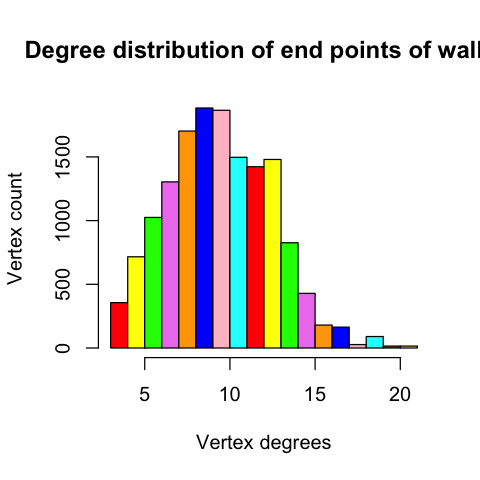

In [39]:
hist(
    W1000$`d(end)`, 
    col=colors,
    main="Degree distribution of end points of walks",
    xlab="Vertex degrees",
    ylab="Vertex count"
)

## Part(d)

In [41]:
W100 = random_walker(100, 0.1, num_walks=100)

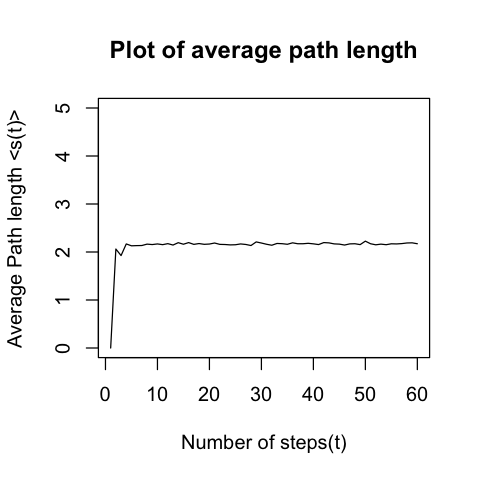

In [42]:
plot_average_path_length(W100, 5)

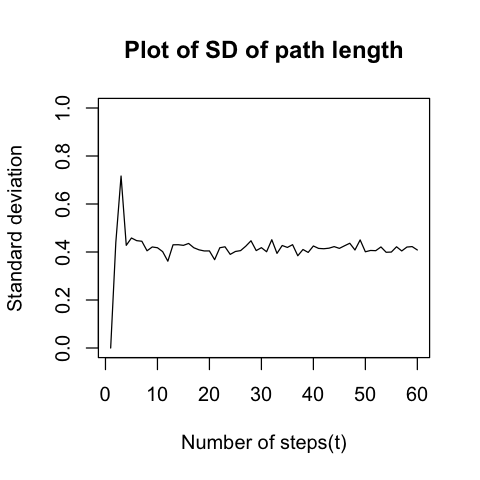

In [43]:
plot_sd_path_length(W100, 1)

In [44]:
W = random_walker(10000, 0.01)

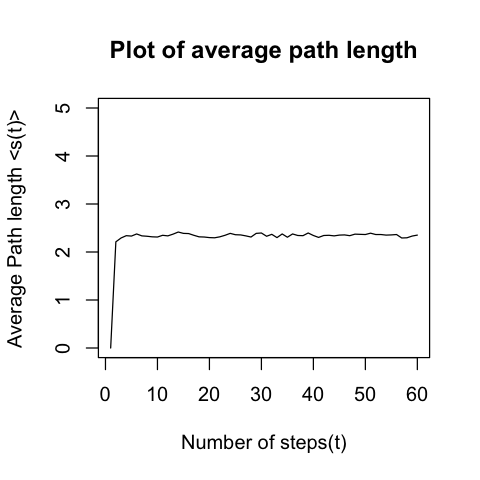

In [45]:
plot_average_path_length(W, 5)

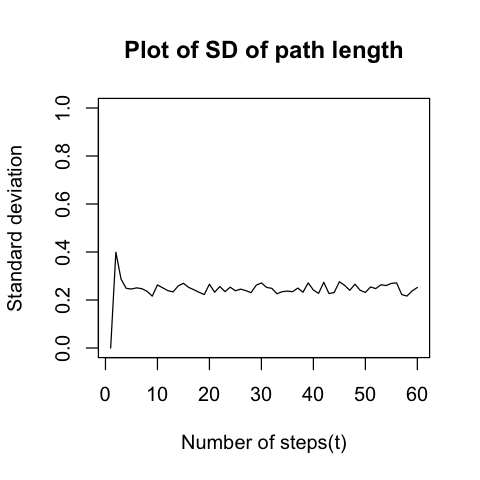

In [46]:
plot_sd_path_length(W, 1.0)